In [3]:
import pandas
import re
import numpy as np
import sklearn.base
import sklearn.datasets
import sklearn.inspection
import sklearn.linear_model
import sklearn.neighbors
import sklearn.pipeline
import sklearn.tree
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB


In [4]:
scat_data = pandas.read_csv('scatcollectcombined.csv')
scat_data.columns = scat_data.iloc[0]
scat_data = scat_data.drop(scat_data.index[0])
scat_data.sort_index(axis = 0, inplace=True)
scat_data

,Sample & GPS Pt Name,Date,Fresh/Old,Species,Latitude,Longitude,Collector,Pic?,Entire Scat?,Date Entry/Initials,NaN
1,AN 1,24 Oct 22,O,Bobcat,37.12596,-122.33492,ZR,TRUE,FALSE,9 Nov 22 / ZR,NaN
2,AN 2,24 Oct 22,O,Coyote?,37.12601,-122.33463,SW,TRUE,TRUE,9 Nov 22 / ZR,NaN
3,AN 3,24 Oct 22,O,Bobcat,37.1264,-122.33204,ZR,TRUE,FALSE,9 Nov 22 / ZR,NaN
4,AN 4,24 Oct 22,O,Coyote?,37.1264,-122.33205,SW,TRUE,TRUE,9 Nov 22 / ZR,NaN
5,AN 5,14 Nov 22,O,Coyote?,37.12661,-122.33618,ZR,TRUE,TRUE,5 Dec 22 / ZR,NaN
...,...,...,...,...,...,...,...,...,...,...,...
357,PR 224,10 Feb 24,O,Coyote?,38.02932,-122.95650,FG,FALSE,TRUE,28 Feb 24 / FG,NaN
358,PR 225,10 Feb 24,F,Coyote?,38.03156,-122.94044,FG,FALSE,TRUE,28 Feb 24 / FG,NaN
359,PR 226,10 Feb 24,O,Coyote,38.02789,-122.96098,FG,FALSE,TRUE,28 Feb 24 / FG,Sequence
360,PR 227,11 Feb 24,F,Mesocarnivore,37.99555,-122.97862,FG,FALSE,TRUE,28 Feb 24 / FG,NaN


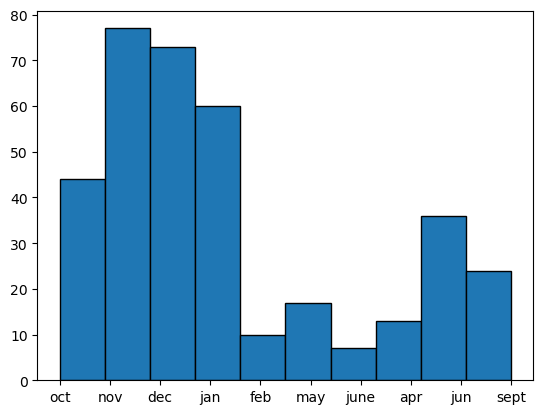

In [5]:
#Dataframe of scat by month/season/year plot?
scat_data = scat_data.apply(lambda x: x.astype(str).str.lower())

for column in scat_data.columns:
    if column in ['Sample & GPS Pt Name', 'Date', 'Species', 'Entire Scat?']:
        scat_data[column] = scat_data[column].apply(lambda x: re.sub(r'\s+', '', x) if isinstance(x, str) else x)


def sortbymonth(frame):
    newframe = frame.copy()
    newframe['Date'] = frame['Date'].astype(str).str.replace(r'\d+', '', regex=True)
    return newframe
        

stripdateframe = sortbymonth(scat_data)
stripdateframe['Date'].hist(edgecolor='black', grid=False)


def sortbyseason(frame):
    newframe = frame.copy()
    searchwinter = ['jan', 'feb', 'mar']
    searchspring = ['apr', 'may', 'jun']
    searchsum = ['jul', 'aug', 'sep']
    searchfall = ['oct', 'nov', 'dec']
    newframe['Date'] = newframe['Date'].apply(lambda x: 'Winter' if any(month in x for month in searchwinter) else x)
    newframe['Date'] = newframe['Date'].apply(lambda x: 'Spring' if any(month in x for month in searchspring) else x)
    newframe['Date'] = newframe['Date'].apply(lambda x: 'Summer' if any(month in x for month in searchsum) else x)
    newframe['Date'] = newframe['Date'].apply(lambda x: 'Fall' if any(month in x for month in searchfall) else x)
    
    #newframe['Date'] = frame['Date'].astype(str).str.replace(r'\d+', '', regex=True)
    #if frame['Date'].astype(str).str.contains('|'.join(searchwinter)):
    #    newframe['Date'] = frame['Date'].astype(str).str.replace(r'', 'win', regex=True)
   # newframe['Date'] = frame['Date'].astype(str).str.contains('mar', 'apr', 'may').replace('spr')
   # newframe['Date'] = frame['Date'].astype(str).str.contains('jun', 'jul', 'aug').replace('sum')
   # newframe['Date'] = frame['Date'].astype(str).str.contains('sep', 'oct', 'nov').replace('fal')
    return newframe




                
        
        

#for column in scat_data.columns:
 #   if column = 

<Axes: >

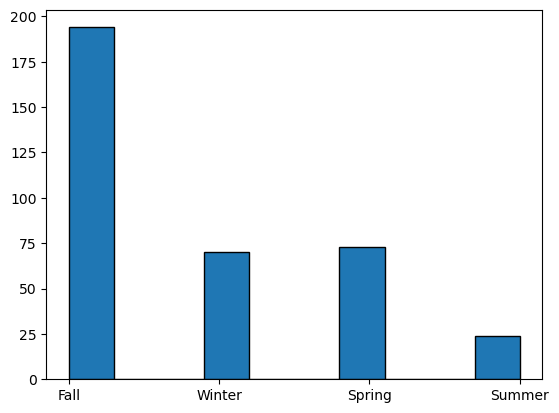

In [6]:
seasonframe = sortbyseason(scat_data)
seasonframe['Date'].hist(edgecolor='black', grid=False)

Scat priority code
1st level: check species (coyotes and mesocarnivores)
2nd level: check dates
3rd level: check if old or fresh 
4th level: check if scats whole

In [41]:
def datesort(frame):
    dum = frame.copy()
    dum['Date'] = pandas.to_datetime(dum['Date'], format='mixed', dayfirst=True)
    dum = dum.sort_values(by='Date', ascending=False)
    return dum

def scatpriority(frame):
    coyoteframe = frame[frame['Species'].str.contains('coyote|mesocarnivore', regex=True)]
    return coyoteframe

def oldfreshsort(frame):
    dum = frame.copy()
    dum['Fresh/Old'] = dum['Fresh/Old'].apply(lambda x: 1 if 'f' in str(x).lower() else 0)
    dum = dum.sort_values(by=['Date','Fresh/Old'], ascending=False)
    return dum
    
fr = scatpriority(scat_data)
dated = datesort(fr)
freshie = oldfreshsort(dated)

dated








,Sample & GPS Pt Name,Date,Fresh/Old,Species,Latitude,Longitude,Collector,Pic?,Entire Scat?,Date Entry/Initials,NaN
361,pr228,2024-02-11,f,coyote?,37.99428,-122.97442,fg,false,true,28 feb 24 / fg,"sequence, seal pup present"
360,pr227,2024-02-11,f,mesocarnivore,37.99555,-122.97862,fg,false,true,28 feb 24 / fg,nan
359,pr226,2024-02-10,o,coyote,38.02789,-122.96098,fg,false,true,28 feb 24 / fg,sequence
358,pr225,2024-02-10,f,coyote?,38.03156,-122.94044,fg,false,true,28 feb 24 / fg,nan
357,pr224,2024-02-10,o,coyote?,38.02932,-122.95650,fg,false,true,28 feb 24 / fg,nan
...,...,...,...,...,...,...,...,...,...,...,...
26,yl8,2022-10-17,o,coyote,36.95211,-122.06613,agb,true,true,18 nov. 22 / sw,nan
28,yl10,2022-10-17,o,coyote,36.95368,-122.06542,zr,false,true,12 nov. 22 / agb,nan
29,yl11,2022-10-17,o,coyote,36.95585,-122.06252,zr,true,true,12 nov. 22 / agb,nan
30,yl12,2022-10-17,o,coyote,36.95587,-122.06528,zr,true,true,12 nov. 22 / agb,nan


In [42]:
freshie

,Sample & GPS Pt Name,Date,Fresh/Old,Species,Latitude,Longitude,Collector,Pic?,Entire Scat?,Date Entry/Initials,NaN
361,pr228,2024-02-11,1,coyote?,37.99428,-122.97442,fg,false,true,28 feb 24 / fg,"sequence, seal pup present"
360,pr227,2024-02-11,1,mesocarnivore,37.99555,-122.97862,fg,false,true,28 feb 24 / fg,nan
358,pr225,2024-02-10,1,coyote?,38.03156,-122.94044,fg,false,true,28 feb 24 / fg,nan
356,pr223,2024-02-10,1,coyote?,38.02909,-122.95724,fg,false,true,28 feb 24 / fg,nan
359,pr226,2024-02-10,0,coyote,38.02789,-122.96098,fg,false,true,28 feb 24 / fg,sequence
...,...,...,...,...,...,...,...,...,...,...,...
25,yl7,2022-10-17,0,coyote,36.95065,-122.06635,agb,true,true,17 nov. 22 / sw,nan
26,yl8,2022-10-17,0,coyote,36.95211,-122.06613,agb,true,true,18 nov. 22 / sw,nan
28,yl10,2022-10-17,0,coyote,36.95368,-122.06542,zr,false,true,12 nov. 22 / agb,nan
29,yl11,2022-10-17,0,coyote,36.95585,-122.06252,zr,true,true,12 nov. 22 / agb,nan
